In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
df = pd.read_csv('C:/jupiter/airports_data.csv', index_col=0)

name - название аэропорта

iata - международная ассоциация воздушного транспорта (IATA)

icao - формат Международной организации гражданской авиации (ИКАО)

lat - широта

lon - долгота

country - страна

alt - высота, измеренная по отношению земной поверхности к уровню моря.

In [3]:
df.head()

,name,iata,icao,lat,lon,country,alt
0,A Coruna Airport,LCG,LECO,43.302059,-8.377250,Spain,326
1,Aachen Merzbruck Airport,AAH,EDKA,50.823051,6.186111,Germany,623
2,Aalborg Airport,AAL,EKYT,57.092781,9.849164,Denmark,10
3,Aarhus Airport,AAR,EKAH,56.300011,10.619000,Denmark,82
4,Aarhus Sea Airport,QEA,EKAC,56.151993,10.247725,Denmark,1


In [4]:
df = df.rename(columns={'country': 'Country'})

Проверим данные 

In [5]:
def check_df(df):
    print(f"DataFrame Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nLast 5 rows:")
    print(df.tail())
    print("\nData types:")
    print(df.dtypes)
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nDescriptive Statistics:")
    print(df.describe(include='all'))
    print("\nUnique values:")
    print(df.nunique())
    print("\nDuplicate rows:")
    print(df.duplicated().sum())
    print("\nCorrelation Matrix:")
    print(df.corr())

In [6]:
check_df(df)

DataFrame Shape: (5095, 7)

First 5 rows:
                       name iata  icao        lat        lon  Country  alt
0          A Coruna Airport  LCG  LECO  43.302059  -8.377250    Spain  326
1  Aachen Merzbruck Airport  AAH  EDKA  50.823051   6.186111  Germany  623
2           Aalborg Airport  AAL  EKYT  57.092781   9.849164  Denmark   10
3            Aarhus Airport  AAR  EKAH  56.300011  10.619000  Denmark   82
4        Aarhus Sea Airport  QEA  EKAC  56.151993  10.247725  Denmark    1

Last 5 rows:
                       name iata  icao        lat         lon      Country  \
5090  Zunyi Xinzhou Airport  ZYI  ZUZY  27.811167  107.245972        China   
5091         Zurich Airport  ZRH  LSZH  47.464722    8.549167  Switzerland   
5092          Zwara Airport  WAX  HLZW  32.933334   12.083333        Libya   
5093    Zweibrucken Airport  ZQW  EDRZ  49.209518    7.400647      Germany   
5094       Zyryanka Airport  ZKP  UESU  65.738335  150.707779       Russia   

       alt  
5090  2723  

C:\Users\kolma\AppData\Local\Temp\ipykernel_11960\30131572.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


Проверим дубли по расположению аэропортов, что бы исключить задвоение одного и того же аэропорта.

In [7]:
df[df[['lat', 'lon']].duplicated()]

,name,iata,icao,lat,lon,Country,alt
812,Charlevoix Municipal Airport,QTM,KCVX,45.304722,-85.275276,United States,669


Обнаружили две записи по одному аэропорту с аналогичным расположением. По информации, найденной в интернете, у аэропорта Charlevoix Municipal Airport была замена кода IATA. Видимо, он просто остался в базе данных. Считаю необходимым исключить его из наших данных.

In [8]:
df.drop(labels = [812], axis = 0, inplace = True)

In [9]:
df[df[['lat', 'lon']].duplicated()]

,name,iata,icao,lat,lon,Country,alt


#### Найдем ТОП-10 стран с наибольшим и наименьшем кол-вом аэропортов.

In [10]:
top_10_airports_in_city = df.groupby('Country')\
                      .agg({'iata' : 'count'})\
                      .sort_values('iata', ascending=False)\
                      .head(10)\
                      .reset_index()

In [11]:
top_10_airports_in_city

,Country,iata
0,United States,1289
1,Canada,273
2,China,239
3,Australia,226
4,Brazil,186
5,Russia,156
6,France,123
7,India,118
8,Indonesia,116
9,Germany,115


Лидером среди стран по количеству аэропортов становятся США (1289 аэропортов), десятку замыкает Германия (115 аэропортов), Россия расположилась на 6 месте (156 аэропортов).

In [12]:
top_10_fewest_airports_in_city = df.groupby('Country')\
                      .agg({'iata' : 'count'})\
                      .sort_values('iata')\
                      .reset_index()

Так как много стран с минимальным кол-во аэропортов(1-4), отфильтровываю данные по странам, где аэропортом более 5.

In [13]:
top_10_fewest_airports_in_city = top_10_fewest_airports_in_city[top_10_fewest_airports_in_city['iata'] > 5]

In [14]:
top_10_fewest_airports_in_city = top_10_fewest_airports_in_city.head(10)

Ситуация с определением минимального кол-ва аэропортов сложнее в интерпретации, так как очень много стран, где кол-во аэропортов не превышает 5.

# Результаты

Для простоты восприятия визуализируем финальные результаты

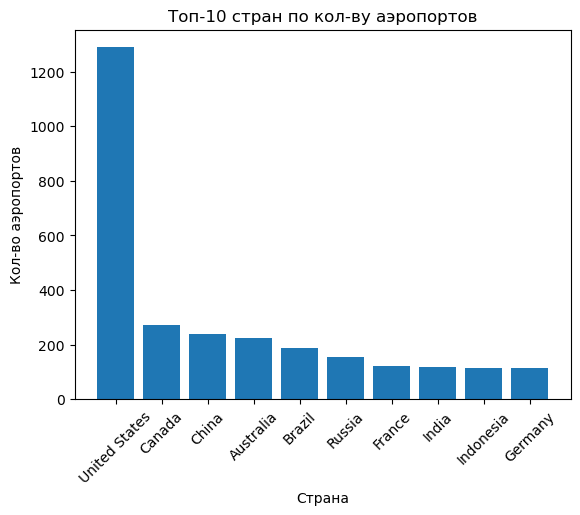

In [15]:
plt.bar(top_10_airports_in_city['Country'], top_10_airports_in_city['iata'])

plt.xticks(rotation=45) 

plt.xlabel('Страна')
plt.ylabel('Кол-во аэропортов')
plt.title('Топ-10 стран по кол-ву аэропортов')

plt.show()

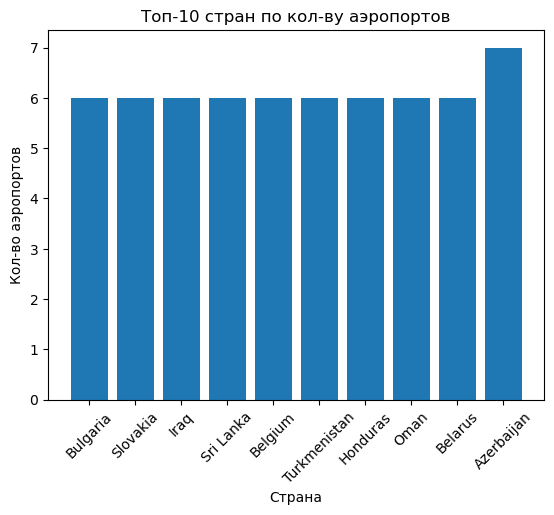

In [16]:
plt.bar(top_10_fewest_airports_in_city['Country'], top_10_fewest_airports_in_city['iata'])

plt.xticks(rotation=45) 

plt.xlabel('Страна')
plt.ylabel('Кол-во аэропортов')
plt.title('Топ-10 стран по кол-ву аэропортов')

plt.show()

Перенесем на карту расположения аэропортов согласно данным по широте и долготе

C:\Users\kolma\AppData\Local\Temp\ipykernel_11960\871292555.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


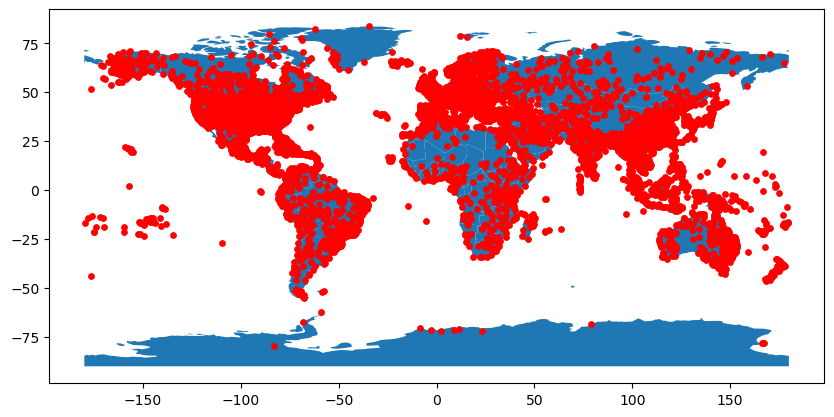

In [17]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

Из распределения аэропортов на карте выше, можно сделать вывод, что большая концентрация аэропортов находится в наиболее заселенных и популярных местах